### 고객 구매 데이터를 활용한 매출 및 기여도 분석

In [10]:
# 데이터 분석과 시각화를 위한 라이브러리 불러오기
import pandas as pd              # 데이터프레임 처리용
import matplotlib.pyplot as plt  # 그래프 그리기용

In [11]:
# 폰트깨짐 matplotlib 설정
import matplotlib.pyplot as plt
import matplotlib
import platform

# 한글 폰트 설정 (운영체제에 따라 자동 적용)
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'     # Windows는 맑은 고딕
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'       # macOS는 Apple Gothic
else:
    plt.rcParams['font.family'] = 'NanumGothic'        # Linux는 나눔고딕 (설치 필요)

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [12]:
# 클래스 정의 및 데이터 생성
class CustomerSalesAnalysis:
    def __init__(self):
        # 샘플 데이터프레임 생성
        self.data = pd.DataFrame({
            '고객명': ['홍길동', '김영희', '홍길동', '이철수', '김영희', '이철수', '박민수', '박민수'],  # 고객 이름
            '구매일자': pd.to_datetime([
                '2024-01-15', '2024-02-20', '2024-02-25',
                '2024-03-05', '2024-04-10', '2024-05-12',
                '2024-06-18', '2024-07-22'               # 구매 날짜
            ]),
            '상품명': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B'],  # 상품 이름
            '수량': [2, 1, 3, 1, 2, 1, 4, 2],                    # 구매 수량
            '단가': [10000, 15000, 10000, 20000, 15000, 20000, 10000, 15000]  # 상품 단가
        })

        # 수량 * 단가로 총매출 열 생성
        self.data['총매출'] = self.data['수량'] * self.data['단가']

    # 월별 매출 분석 함수
    def plot_monthly_sales(self):
        # '월' 열 추가 (구매일자를 월 단위로 변환)
        self.data['월'] = self.data['구매일자'].dt.to_period('M')
        
        # 월별 매출 총합 계산
        monthly_sales = self.data.groupby('월')['총매출'].sum()
        
        # 그래프 크기 설정
        plt.figure(figsize=(10, 5))
        
        # 막대 그래프 생성
        monthly_sales.plot(kind='bar', color='skyblue')
        
        # 그래프 제목
        plt.title('월별 매출 총합')
        
        # y축 라벨
        plt.ylabel('총매출 (원)')
        
        # x축 라벨
        plt.xlabel('구매 월')
        
        # x축 라벨 각도 조정
        plt.xticks(rotation=45)
        
        # y축 기준선 추가
        plt.grid(axis='y')
        
        # 레이아웃 조정
        plt.tight_layout()
        
        # 그래프 출력
        plt.show()

    # 고객별 누적 매출 분석 함수
    def plot_customer_contribution(self):
        # 고객별 총매출 계산
        customer_sales = self.data.groupby('고객명')['총매출'].sum()
        
        # 그래프 크기 설정
        plt.figure(figsize=(7, 7))
        
        # 파이 차트 생성
        customer_sales.plot(
            kind='pie',             # 파이 차트 형태
            autopct='%.1f%%',       # 퍼센트 표시
            startangle=90,          # 시작 각도
            counterclock=False      # 시계 방향 정렬
        )
        
        # 그래프 제목
        plt.title('고객별 누적 매출 기여도')
        
        # y축 라벨 제거
        plt.ylabel('')
        
        # 원형 형태 유지
        plt.axis('equal')
        
        # 레이아웃 조정
        plt.tight_layout()
        
        # 그래프 출력
        plt.show()

In [13]:
# 분석기 객체 생성
analyzer = CustomerSalesAnalysis()

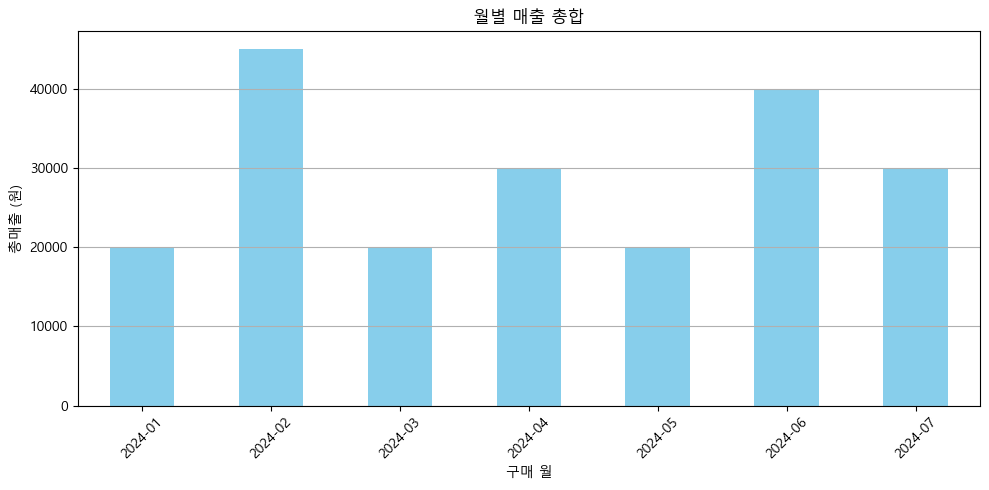

In [14]:
# 월별 매출 총합 시각화
analyzer.plot_monthly_sales()

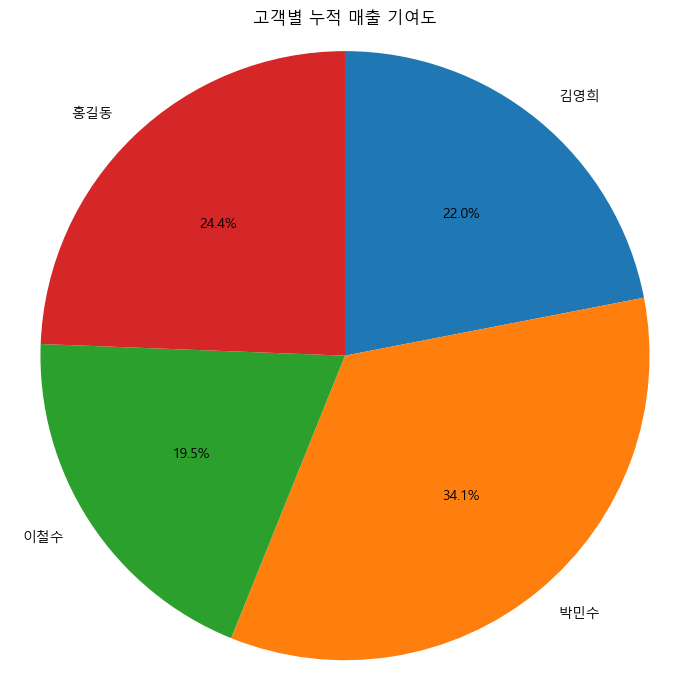

In [15]:
# 고객별 누적 매출 기여도 시각화
analyzer.plot_customer_contribution()